In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\PARNA MISHRA\Downloads\test.csv", delimiter=';', quotechar='"')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df.shape

(4521, 17)

In [6]:
df['marital'].nunique()

3

In [7]:
df['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [8]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
categoric=[]

In [10]:

categoric=df.select_dtypes(include="object").columns.tolist()


In [11]:
categoric

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [12]:
for i in categoric:
    df[i]=label.fit_transform(df[i])

In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [14]:
df['pdays']

0        -1
1       339
2       330
3        -1
4        -1
       ... 
4516     -1
4517     -1
4518     -1
4519    211
4520    249
Name: pdays, Length: 4521, dtype: int64

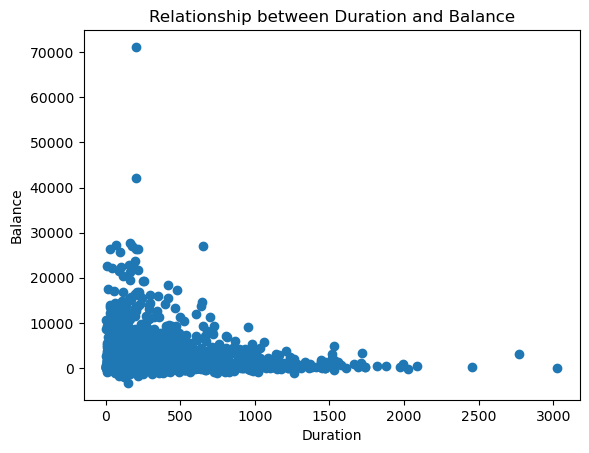

In [15]:
plt.scatter(df['duration'], df['balance'])
plt.title('Relationship between Duration and Balance')
plt.xlabel('Duration')
plt.ylabel('Balance')
plt.show()


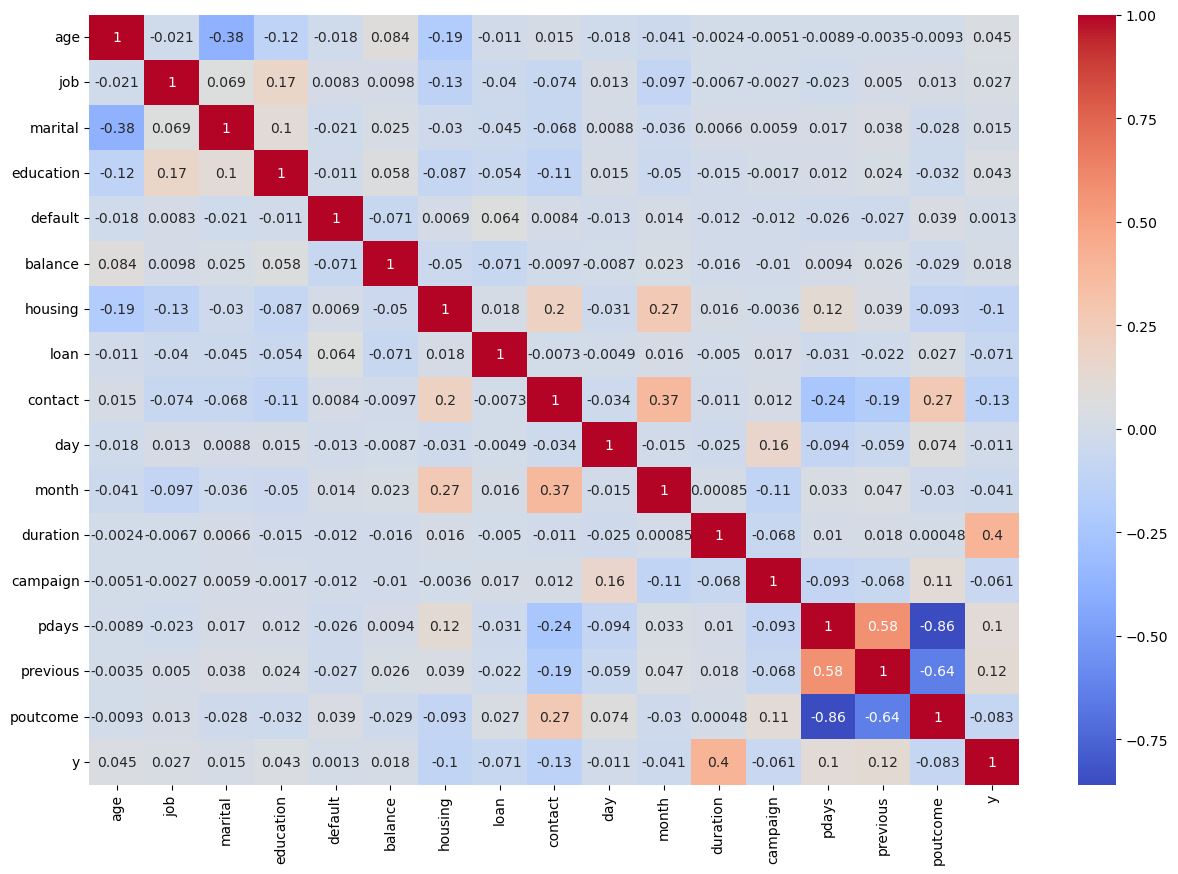

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

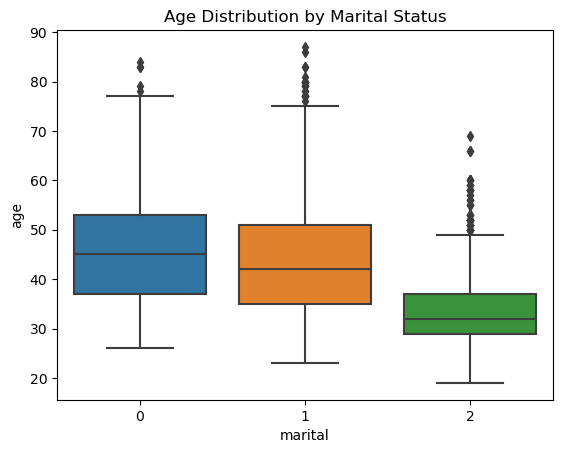

In [17]:
sns.boxplot(x='marital', y='age', data=df)
plt.title('Age Distribution by Marital Status')
plt.show()


In [18]:
from sklearn.tree import DecisionTreeClassifier


In [19]:
model=DecisionTreeClassifier()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X=df.iloc[:,:-1]

In [22]:
y=df.iloc[:,-1]

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [24]:
X_train.shape

(3164, 16)

In [25]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
y_pred=model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score,f1_score,recall_score

In [28]:
print(accuracy_score(y_pred,y_test))

0.8555637435519529


In [29]:
f1_score(y_test,y_pred,average='weighted')

0.8563815779325273

In [30]:
train_accuracies = []
test_accuracies = []

max_depth_range = range(1, 21)  # Let's consider tree depths from 1 to 20
for i, depth in enumerate(max_depth_range):
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    print(f"Iteration {i} : train : {train_accuracies[i]}, test : {test_accuracies[i]}")


Iteration 0 : train : 0.8833754740834386, test : 0.887988209285188
Iteration 1 : train : 0.8915929203539823, test : 0.8887251289609432
Iteration 2 : train : 0.8950695322376738, test : 0.887988209285188
Iteration 3 : train : 0.9102402022756005, test : 0.8931466470154753
Iteration 4 : train : 0.918141592920354, test : 0.8916728076639646
Iteration 5 : train : 0.9247787610619469, test : 0.894620486366986
Iteration 6 : train : 0.9329962073324906, test : 0.8894620486366986
Iteration 7 : train : 0.9424778761061947, test : 0.8865143699336773
Iteration 8 : train : 0.9516434892541087, test : 0.8857774502579219
Iteration 9 : train : 0.9576485461441213, test : 0.8813559322033898
Iteration 10 : train : 0.9664981036662452, test : 0.8865143699336773
Iteration 11 : train : 0.9725031605562579, test : 0.8798820928518791
Iteration 12 : train : 0.9800884955752213, test : 0.8695652173913043
Iteration 13 : train : 0.9851453855878635, test : 0.8754605747973471
Iteration 14 : train : 0.9905183312262958, test 

Text(0, 0.5, 'Accuracies')

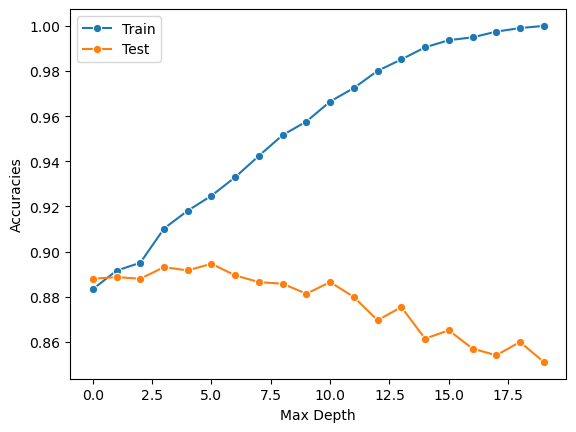

In [31]:
sns.lineplot(train_accuracies,marker='o',label='Train')
sns.lineplot(test_accuracies,marker='o',label='Test')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracies')

In [32]:
from sklearn.metrics import classification_report
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
r = classification_report(y_pred,y_test)
print(r)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1259
           1       0.34      0.52      0.41        98

    accuracy                           0.89      1357
   macro avg       0.65      0.72      0.67      1357
weighted avg       0.92      0.89      0.90      1357



In [33]:
# Split data into features and target
X = df.drop('y', axis=1)
from sklearn.preprocessing import StandardScaler
y = df['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally scale data for Naive Bayes if features are on very different scales
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
# Create a Gaussian Naive Bayes classifier\
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_nb = gnb.predict(X_test_scaled)


In [35]:
# Calculate metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_score_nb = f1_score(y_test, y_pred_nb,average="weighted")

print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Recall:", recall_nb)
print("Naive Bayes F1 Score:", f1_score_nb)


Naive Bayes Accuracy: 0.8265193370165745
Naive Bayes Recall: 0.4489795918367347
Naive Bayes F1 Score: 0.8411515718496815


In [36]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


C:\Users\PARNA MISHRA\AppData\Local\Temp\ipykernel_20756\4206699037.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='education', y='balance', data=df, estimator=sum, ci=None)  # Sum of balances by education level


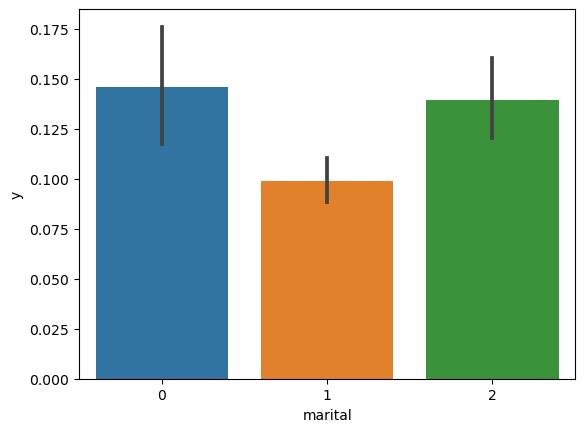

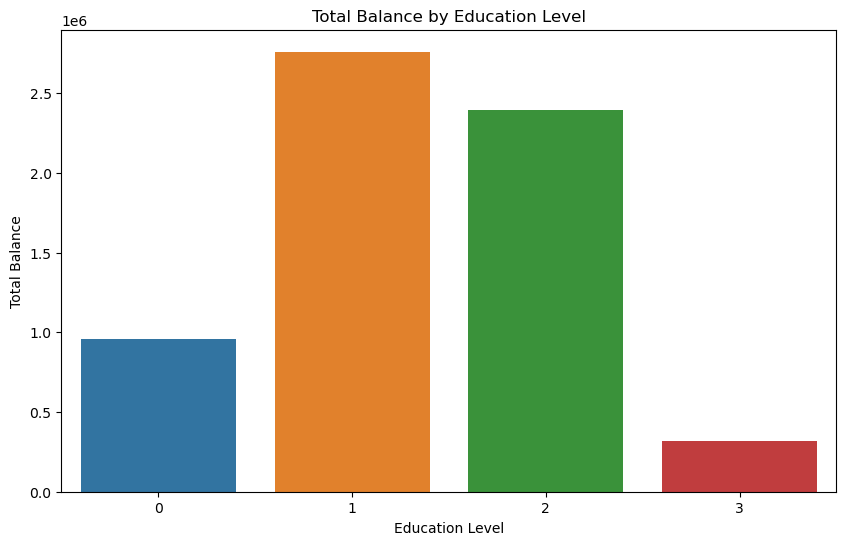

In [37]:
sns.barplot(df,x='marital',y='y')
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='education', y='balance', data=df, estimator=sum, ci=None)  # Sum of balances by education level
plt.title('Total Balance by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Total Balance')
plt.show()


In [38]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler  # If feature scaling is needed


In [39]:
# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = random_forest.predict(X_test)


In [40]:
# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_score_rf)


Random Forest Accuracy: 0.901657458563536
Random Forest Recall: 0.2653061224489796
Random Forest F1 Score: 0.36879432624113473


In [41]:
# Initialize Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit model
gradient_boosting.fit(X_train, y_train)

# Predict
y_pred_gb = gradient_boosting.predict(X_test)

# Evaluate
accuracy_gb = accuracy_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_score_gb = f1_score(y_test, y_pred_gb)

print("Gradient Boosting Accuracy:", accuracy_gb)
print("Gradient Boosting Recall:", recall_gb)
print("Gradient Boosting F1 Score:", f1_score_gb)


Gradient Boosting Accuracy: 0.8917127071823204
Gradient Boosting Recall: 0.2755102040816326
Gradient Boosting F1 Score: 0.35526315789473684


In [42]:
# Initialize AdaBoost Classifier
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit model
adaboost.fit(X_train, y_train)

# Predict
y_pred_ab = adaboost.predict(X_test)

# Evaluate
accuracy_ab = accuracy_score(y_test, y_pred_ab)
recall_ab = recall_score(y_test, y_pred_ab)
f1_score_ab = f1_score(y_test, y_pred_ab)

print("AdaBoost Accuracy:", accuracy_ab)
print("AdaBoost Recall:", recall_ab)
print("AdaBoost F1 Score:", f1_score_ab)


AdaBoost Accuracy: 0.8928176795580111
AdaBoost Recall: 0.1326530612244898
AdaBoost F1 Score: 0.21138211382113822


In [43]:
import matplotlib.pyplot as plt

# Assume the accuracy variables are already defined from the earlier evaluation:
# accuracy_rf, accuracy_gb, accuracy_ab

# Labels for the models
model_names = ['Random Forest', 'Gradient Boosting', 'AdaBoost']

# Corresponding accuracies
accuracies = [accuracy_rf, accuracy_gb, accuracy_ab]

# Colors for differentiating the models
colors = ['green', 'blue', 'red']


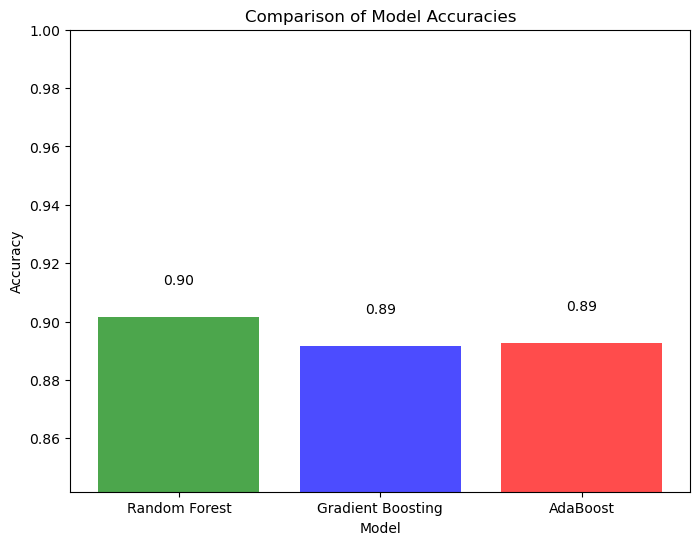

In [44]:
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=colors, alpha=0.7)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([min(accuracies) - 0.05, 1])  # Adjust y-axis limits to show differences more clearly
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()


In [45]:
from sklearn.svm import SVC


In [46]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline


In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [49]:
# Create an SVM classifier with a linear kernel
linear_svc = SVC(kernel='linear')

# Train the model
linear_svc.fit(X_train_scaled, y_train)

# Predictions
y_pred_linear = linear_svc.predict(X_test_scaled)

# Evaluate the model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy (Linear SVM):", accuracy_linear)
print("Classification Report (Linear SVM):")
print(classification_report(y_test, y_pred_linear))


Accuracy (Linear SVM): 0.8917127071823204
Classification Report (Linear SVM):
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       807
           1       0.00      0.00      0.00        98

    accuracy                           0.89       905
   macro avg       0.45      0.50      0.47       905
weighted avg       0.80      0.89      0.84       905



C:\Users\PARNA MISHRA\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PARNA MISHRA\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PARNA MISHRA\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
# Create an SVM classifier with RBF kernel
rbf_svc = SVC(kernel='rbf')

# Train the model
rbf_svc.fit(X_train_scaled, y_train)

# Predictions
y_pred_rbf = rbf_svc.predict(X_test_scaled)

# Evaluate the model
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy (RBF SVM):", accuracy_rbf)
print("Classification Report (RBF SVM):")
print(classification_report(y_test, y_pred_rbf))


Accuracy (RBF SVM): 0.8950276243093923
Classification Report (RBF SVM):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.54      0.20      0.30        98

    accuracy                           0.90       905
   macro avg       0.73      0.59      0.62       905
weighted avg       0.87      0.90      0.87       905



In [51]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Setting up the parameter grid with a smaller set
param_grid_linear = {'C': [1, 10]}  # Simplified grid

# Create an instance of LinearSVC
linear_svc = LinearSVC(dual=False)  # dual=False when n_samples > n_features

# Setup the grid search with fewer CV folds and parallel processing
grid_search_linear = GridSearchCV(linear_svc, param_grid_linear, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_linear.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters (Linear):", grid_search_linear.best_params_)
print("Best cross-validation score (Linear):", grid_search_linear.best_score_)

# Evaluate on the test set
y_pred_linear = grid_search_linear.predict(X_test_scaled)
print("Test set accuracy (Linear):", accuracy_score(y_test, y_pred_linear))


Best parameters (Linear): {'C': 1}
Best cross-validation score (Linear): 0.886061394273446
Test set accuracy (Linear): 0.8917127071823204


<h1>logistic regression</h1>

In [52]:
# Create a logistic regression classifier
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8939226519337017
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.53      0.18      0.27        98

    accuracy                           0.89       905
   macro avg       0.72      0.58      0.61       905
weighted avg       0.87      0.89      0.87       905



In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Set up a more concise hyperparameter grid
param_grid = {
    'C': np.logspace(-2, 2, 5),  # Fewer, broader range of C values
    'penalty': ['l2']  # Only using L2 as it is more common and generally robust
}

# Create a GridSearchCV object with parallel processing and fewer CV folds
log_reg_cv = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=3,  # Fewer folds
    scoring='accuracy',
    verbose=1,
    n_jobs=-1  # Use all cores
)

# Fit it to the data
log_reg_cv.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best parameters found: ", log_reg_cv.best_params_)
print("Best accuracy found: ", log_reg_cv.best_score_)

# Evaluate using the best estimator
y_pred_cv = log_reg_cv.predict(X_test_scaled)
accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Accuracy with Hyperparameter Tuning:", accuracy_cv)
print("Classification Report with Hyperparameter Tuning:")
print(classification_report(y_test, y_pred_cv))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters found:  {'C': 1.0, 'penalty': 'l2'}
Best accuracy found:  0.887997999857788
Accuracy with Hyperparameter Tuning: 0.8939226519337017
Classification Report with Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.53      0.18      0.27        98

    accuracy                           0.89       905
   macro avg       0.72      0.58      0.61       905
weighted avg       0.87      0.89      0.87       905



In [54]:
from sklearn.model_selection import cross_val_score
model = LogisticRegression()

scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Cross-Validation Scores: [0.88535912 0.89349931 0.89073306 0.88520055 0.87966805]
Mean CV Score: 0.8868920168420409


In [55]:
clf=DecisionTreeClassifier()

<Axes: xlabel='y', ylabel='count'>

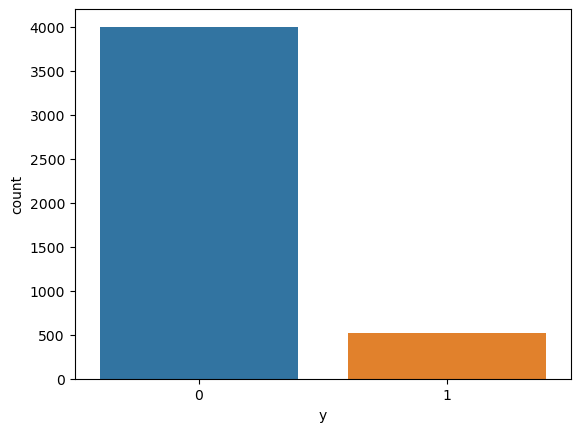

In [62]:
sns.countplot(x=df['y'],data=df)

C:\Users\PARNA MISHRA\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PARNA MISHRA\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PARNA MISHRA\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PARNA MISHRA\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default 

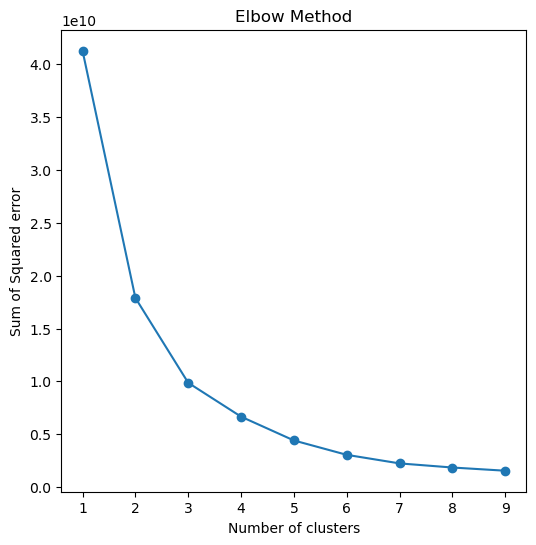

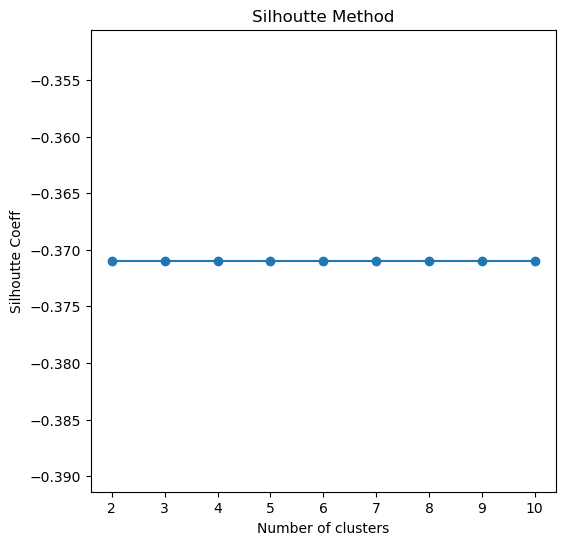

[-0.3709686216335572, -0.3709686216335572, -0.3709686216335572, -0.3709686216335572, -0.3709686216335572, -0.3709686216335572, -0.3709686216335572, -0.3709686216335572, -0.3709686216335572]


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('kmeans', KMeans(n_clusters=6, n_init=10, random_state=42))])

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df.head(3)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6,n_init=10,max_iter=300,random_state=42,init="random")

df['Cluster'] = kmeans.fit_predict(X_scaled)
df["Cluster"] = df["Cluster"].astype("category")
df.head()


kmeans.inertia_
kmeans.cluster_centers_

sum_se = []
list_k = list(range(1,10))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sum_se.append(km.inertia_)
plt.figure(figsize=(6,6))
plt.plot(list_k,sum_se,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared error')
plt.title(label="Elbow Method")
plt.show()

from sklearn.metrics import silhouette_score
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 100,"random_state": 42}
from sklearn.metrics import silhouette_score
silhoutte_coef = []
for k in range(2,11):
    km = KMeans(n_clusters=k,**kmeans_kwargs)
    km.fit(df)
    score = silhouette_score(df,kmeans.labels_)
    silhoutte_coef.append(score)

plt.figure(figsize=(6,6))
plt.plot(range(2,11),silhoutte_coef,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Coeff')
plt.title(label="Silhoutte Method")
plt.show()
print(silhoutte_coef)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df.values

preprocessor = Pipeline([
    ("scaler",StandardScaler()),
    ("pca",PCA(n_components=2,random_state=42))
])
kmeans = KMeans(n_clusters=6, n_init=10, max_iter=300, random_state=42)


# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', kmeans)
])

# Fit the pipeline to your data
pipeline.fit(df)

C:\Users\PARNA MISHRA\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


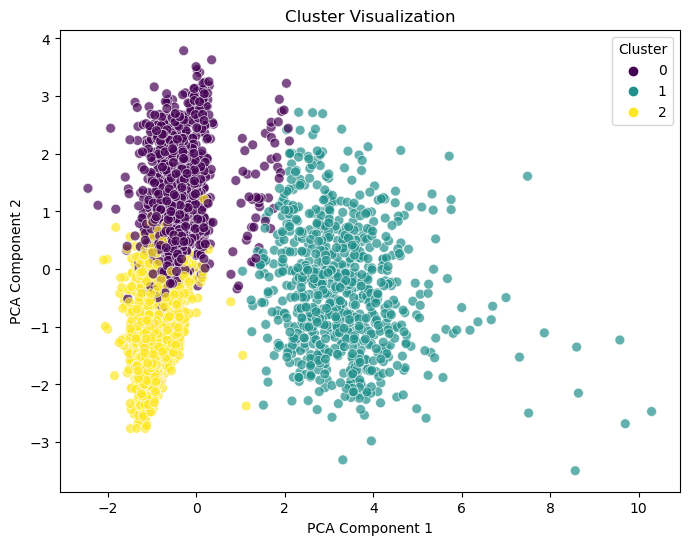

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and it's already loaded
# Selecting a subset of columns for clustering if needed, or using all columns
X = df.select_dtypes(include=[np.number])  # Only numeric columns

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters
clusters = kmeans.fit_predict(X_scaled)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=50, alpha=0.7)
plt.title('Cluster Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [66]:
from sklearn.svm import SVC


In [67]:
svm_linear=SVC(kernel='linear')

In [69]:
param={'C':[0.01,1,10]}
grid_search_linear=GridSearchCV(svm_linear,param,cv=5)
grid_search_linear.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.01, 1, 10]})

In [75]:
svm_rbf=SVC(kernel='rbf')
param={'C':[0.01,1,10],'gamma':[0.01,1,10]}
grid_search_kernel=GridSearchCV(svm_rbf,param,cv=5)
grid_search_kernel.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 1, 10], 'gamma': [0.01, 1, 10]})

In [76]:
# Use the best models to make predictions
best_model_linear = grid_search_linear.best_estimator_
y_pred_linear = best_model_linear.predict(X_test)

best_model_kernel = grid_search_kernel.best_estimator_
y_pred_kernel = best_model_kernel.predict(X_test)

# Evaluate the models
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_kernel = accuracy_score(y_test, y_pred_kernel)

print("Accuracy for linear SVM:", accuracy_linear)
print("Accuracy for kernel SVM:", accuracy_kernel)

Accuracy for linear SVM: 0.8917127071823204
Accuracy for kernel SVM: 0.8917127071823204


In [78]:
%pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.4/99.8 MB 11.2 MB/s eta 0:00:09
    --------------------------------------- 1.6/99.8 MB 19.8 MB/s eta 0:00:05
   - -------------------------------------- 2.9/99.8 MB 22.9 MB/s eta 0:00:05
   - -------------------------------------- 4.1/99.8 MB 23.8 MB/s eta 0:00:05
   -- ------------------------------------- 6.0/99.8 MB 27.5 MB/s eta 0:00:04
   --- ------------------------------------ 7.7/99.8 MB 28.8 MB/s eta 0:00:04
   --- ------------------------------------ 9.1/99.8 MB 29.0 MB/s eta 0:00:04
   --- ------------------------------------ 9.7/99.8 MB 27.1 MB/s eta 0:00:04
   ---- ----------------------------------- 10.6/99.8 MB 29.7 MB/s eta 0:00:03
   ---- --------------

In [79]:
import xgboost as xg

In [84]:
xgb_model=xg.XGBClassifier()

In [87]:
param_grid = {
    'n_estimators': [100],            # Number of boosting rounds
    'learning_rate': [0.01],          # Step size shrinkage
    'max_depth': [3],                     # Maximum depth of a tree
    'min_child_weight': [1],              # Minimum sum of instance weight needed in a child
    'gamma': [0],                     # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'subsample': [0.6],               # Subsample ratio of the training instances
    'colsample_bytree': [0.6]         # Subsample ratio of columns when constructing each tree
}


In [89]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Refit the model using the best hyperparameters
best_model = xg.XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

Best Hyperparameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.6}
0.8917127071823204


In [90]:
clf

DecisionTreeClassifier()

In [91]:
model=clf

In [92]:
model

DecisionTreeClassifier()

In [93]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

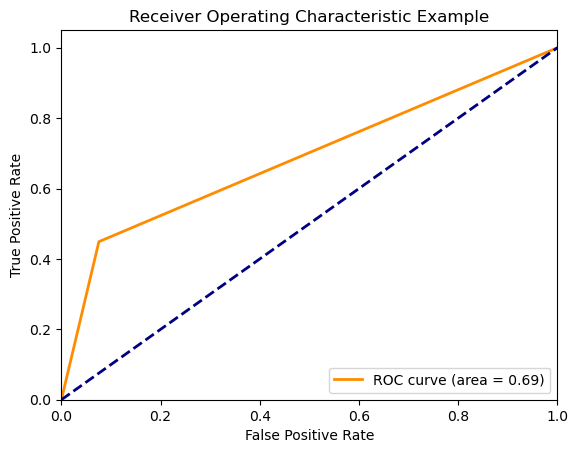

In [98]:
# Predict probabilities for the positive class
from sklearn.metrics import roc_auc_score,roc_curve,rand_score,auc
y_scores = model.predict_proba(X_test)[:, 1]  # get probabilities for the positive class

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()